<a href="https://colab.research.google.com/github/silverjin01/2020-2-AI/blob/master/09W_2_reg_mpg_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# 산점도 행렬을 그리기 위해 seaborn 패키지를 설치합니다
!pip install -q seaborn

In [18]:
# 필요 모듈 가져오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path #print(dataset_path)

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [21]:
# 데이터 읽어 dataset에 저장(판다스를 사용하여 데이터를 읽기)
col_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration',
'Model Year', 'Origin']
raw_data = pd.read_csv(dataset_path,
names=col_names, na_values = "?", comment='\t', sep=" ",
skipinitialspace=True)
dataset = raw_data.copy()
dataset.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [22]:
# 데이터 형태와 비어 있는 열 조사
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [24]:
dataset.shape

(392, 8)

In [25]:
# 데이터 정제, 비어있는 열의 행의 수 알아내기
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [26]:
# 데이터 정제, 비어 있는 열이 하나라도 있는 행을 제거
dataset = dataset.dropna()
dataset.shape

(392, 8)

In [27]:
# 열 'Origin'을 빼내 origin에 저장
origin = dataset.pop('Origin')
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [28]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [29]:
# 'Origin' 열은 수치형이 아니고 범주형이므로 원-핫 인코딩으로 변한
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [31]:
# 데이터셋을 훈련 세트와 테스트 세트로 분할
# 전체 자료에서 80%를 훈현 데이터로 사용
train_dataset = dataset.sample(frac=0.8, random_state=0)
print(train_dataset)
# 전체 자료에서 나머지 20%를 테스트 데이터로 사용
test_dataset = dataset.drop(train_dataset.index)
print(test_dataset)

      MPG  Cylinders  Displacement  Horsepower  ...  Model Year  USA  Europe  Japan
146  28.0          4          90.0        75.0  ...          74  1.0     0.0    0.0
282  22.3          4         140.0        88.0  ...          79  1.0     0.0    0.0
69   12.0          8         350.0       160.0  ...          72  1.0     0.0    0.0
378  38.0          4         105.0        63.0  ...          82  1.0     0.0    0.0
331  33.8          4          97.0        67.0  ...          80  0.0     0.0    1.0
..    ...        ...           ...         ...  ...         ...  ...     ...    ...
281  19.8          6         200.0        85.0  ...          79  1.0     0.0    0.0
229  16.0          8         400.0       180.0  ...          77  1.0     0.0    0.0
150  26.0          4         108.0        93.0  ...          74  0.0     0.0    1.0
145  32.0          4          83.0        61.0  ...          74  0.0     0.0    1.0
182  28.0          4         107.0        86.0  ...          76  0.0     1.0

In [32]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(train_dataset.shape, test_dataset.shape)

(314, 10) (78, 10)


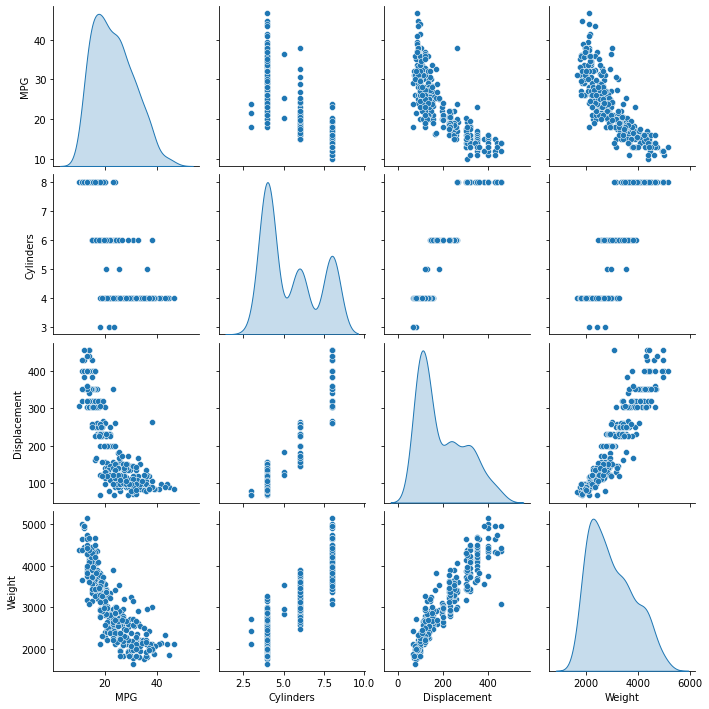

In [33]:
#%%
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], 
diag_kind="kde")

In [34]:
# 전반적인 통계도 확인
train_stats = train_dataset.describe()
print(train_stats)

              MPG   Cylinders  Displacement  ...         USA      Europe       Japan
count  314.000000  314.000000    314.000000  ...  314.000000  314.000000  314.000000
mean    23.310510    5.477707    195.318471  ...    0.624204    0.178344    0.197452
std      7.728652    1.699788    104.331589  ...    0.485101    0.383413    0.398712
min     10.000000    3.000000     68.000000  ...    0.000000    0.000000    0.000000
25%     17.000000    4.000000    105.500000  ...    0.000000    0.000000    0.000000
50%     22.000000    4.000000    151.000000  ...    1.000000    0.000000    0.000000
75%     28.950000    8.000000    265.750000  ...    1.000000    0.000000    0.000000
max     46.600000    8.000000    455.000000  ...    1.000000    1.000000    1.000000

[8 rows x 10 columns]


In [35]:
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats.head(9)

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [38]:
# 레이블을 만들고 원 데이터집합에서 제거
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

KeyError: ignored

In [39]:
# 정규화된 데이터를 사용하여 모델을 훈련
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,-1.286751,2.143005,-0.495225


In [42]:
# 두 개의 완전 연결 은닉층으로 sequential 모델
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 모델을 한번 실행(훈련 세트에서 10 샘플을 하나의 배치로 만듦)
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.5293302 ],
       [-0.33422154],
       [-0.03113186],
       [-0.36953804],
       [-0.44028556],
       [-0.11075404],
       [-0.4602939 ],
       [-0.42764786],
       [-0.0874967 ],
       [-0.57132846]], dtype=float32)

In [44]:
# 모델 훈련
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [45]:
# 히스토리 객체에 저장된 통계치를 사용
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.468005,1.038084,2.468005,9.639721,2.315133,9.639721,995
996,2.515988,1.009662,2.515988,9.929306,2.397997,9.929306,996
997,2.492899,0.994423,2.492899,10.200850,2.420578,10.200850,997
998,2.482363,0.996659,2.482363,9.206737,2.255819,9.206737,998
999,2.425031,1.009394,2.425031,9.614907,2.305176,9.614907,999


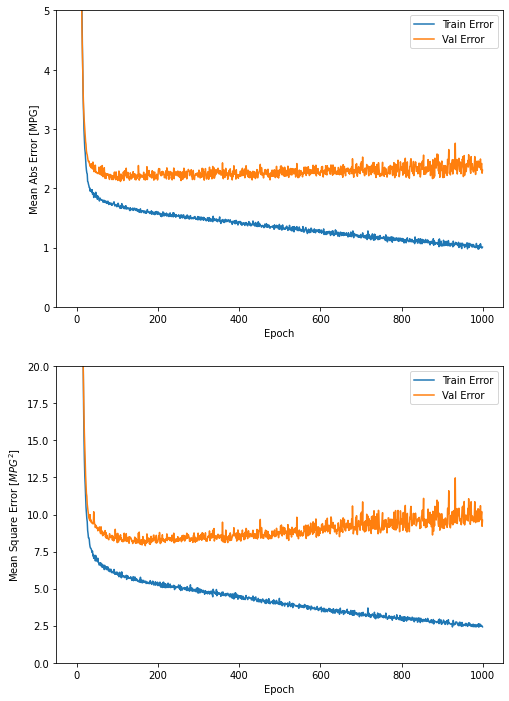

In [46]:
# 훈련 과정을 시각화
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


.......................................................................................

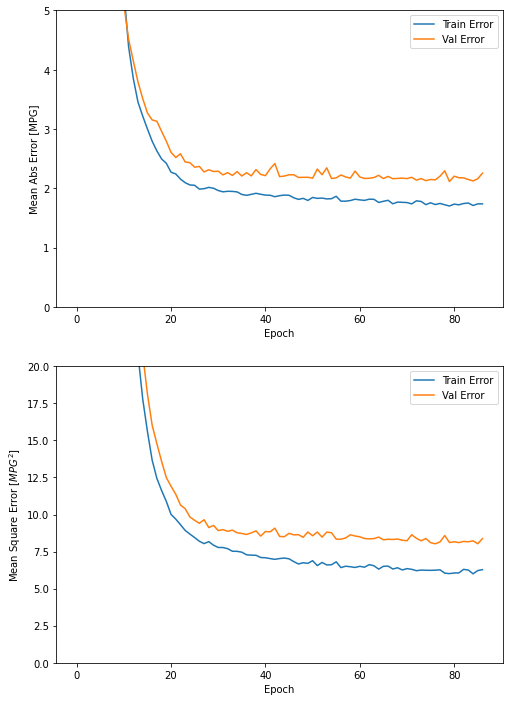

In [47]:
# EarlyStopping 콜백
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [48]:
# 모델의 성능을 확인
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.6209 - mae: 1.7934 - mse: 5.6209
테스트 세트의 평균 절대 오차:  1.79 MPG


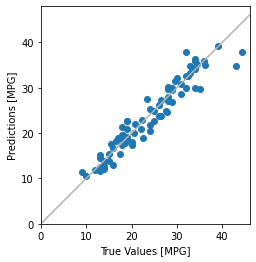

In [49]:
# 예측
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal') # 각 축의 범위와 축의 스케일을 동일하게 설정
plt.axis('square') # 각 축의 범위를 xmax-xmin = ymax - ymin 이 되도록 설정
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], c='.7')


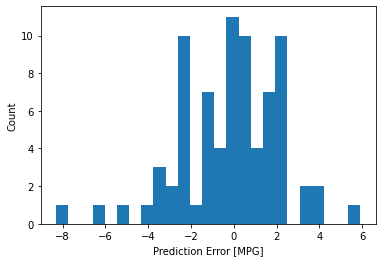

In [51]:
# 예측(2)
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")